In [14]:
import pandas as pd 
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
import math

In [31]:
x = np.arange(0,2*math.pi,0.01)
z = np.random.normal(size=len(x))*0.5
signal = np.sin(x)+z

In [119]:
def GuassianKernal(x,h):
    return stats.norm.pdf(x,loc=0,scale=h)

def KernelSmooth(x, signal, h, kernel):
    m = np.zeros(len(x))
    m_hat = np.zeros(len(x))
    for t in range(len(x)):
        this_x = x[t]
        k = kernel(this_x-x,h)
        g = np.mean(k)
        w = k/g
        m[t] = np.mean(w*signal)
        m_hat[t] = (np.sum(w*signal)-w[t]*signal[t])/len(x)
        cv = np.mean((signal-m_hat)**2)
    return m, m_hat, cv        

m,m_hat,cv = KernelSmooth(x, signal, 0.08, GuassianKernal)

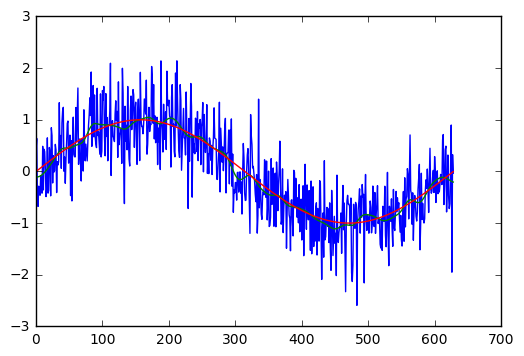

0.27014536983948073

In [120]:
plt.plot(signal)
plt.plot(m)
plt.plot(np.sin(x))
plt.show()
cv

In [111]:
window = 30
nobs = len(x)
for i in range(nobs-window):
    sample_signal = signal[i:i+window]
    sample_x = x[i:i+window]
    sample_m = KernelSmooth(sample_x, sample_signal, 0.08, GuassianKernal)
    

0.267975754949342